# - Autor: 
### Borja Delgado González
# - Objetivo: 
### Limpieza de datos para programar una regresión lineal para la predicción de ventas de videjuegos
---

1. Importamos las librerías a usar en este proyecto

In [1]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('ventas_vj_completo.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,videojuego,plataforma,genero,editor,desarrollador,ventas_na,ventas_eu,ventas_jp,ventas_otras,ventas_tot,fecha_salida
0,0,0,Tetris,Series,Puzzle,Nintendo,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,1989.0
1,1,1,Pokemon,Series,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,1998.0
2,2,2,Call of Duty,Series,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,2003.0
3,3,3,Super Mario,Series,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,1983.0
4,4,4,Grand Theft Auto,Series,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,1998.0


 Eliminamos las dos primeras columnas y luego obtenemos la información del DataFrame para ver a qué nos enfrentamos.

In [3]:
df = df.drop(columns=df.columns[0:2], axis=1)

df.head()

,videojuego,plataforma,genero,editor,desarrollador,ventas_na,ventas_eu,ventas_jp,ventas_otras,ventas_tot,fecha_salida
0,Tetris,Series,Puzzle,Nintendo,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,1989.0
1,Pokemon,Series,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,1998.0
2,Call of Duty,Series,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,2003.0
3,Super Mario,Series,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,1983.0
4,Grand Theft Auto,Series,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,1998.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62436 entries, 0 to 62435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videojuego     62436 non-null  object 
 1   plataforma     62436 non-null  object 
 2   genero         62436 non-null  object 
 3   editor         62436 non-null  object 
 4   desarrollador  62436 non-null  object 
 5   ventas_na      13659 non-null  float64
 6   ventas_eu      14023 non-null  float64
 7   ventas_jp      7675 non-null   float64
 8   ventas_otras   16368 non-null  float64
 9   ventas_tot     20305 non-null  float64
 10  fecha_salida   56784 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.2+ MB


Para la creación de este algoritmo de regresión, eliminaremos todas aquellas filas que no tengan fecha de salida. Además, tendremos que crear algunos datos sintéticos para las ventas, ya que si no el dataset quedaría muy pequeño si elimináramos todos los missing_values de estas columnas.

---

Primero realizamos la limpieza de datos...

In [5]:
#Variables

generos = {'Action' : 'Acción',
        'Action-Adventure' : 'Acción-Aventura',
        'Adventure' : 'Aventura',
        'Board Game' : 'Juego de mesa',
        'Education' : 'Educación',
        'Fighting' : 'Lucha',
        'Music' : 'Música',
        'Party' : 'Fiesta',
        'Platform' : 'Plataformas',
        'Racing' : 'Carreras',
        'Role-Playing' : 'RPG',
        'Sandbox' : 'Mundo abierto',
        'Simulation' : 'Simulación',
        'Sports' : 'Deportes',
        'Strategy' : 'Estrategia',
        'Visual Novel' : 'Novela Visual'}

ventas = ['ventas_na','ventas_eu','ventas_jp', 'ventas_otras', 'ventas_tot']

etiquetas = ['Acción', 'Acción-Aventura', 'Aventura', 'Carreras', 'Deportes', 'Educación', 'Estrategia', 'Fiesta', 'Juego de mesa',
            'Lucha', 'MMO', 'Misc', 'Mundo abierto', 'Música', 'Novela Visual', 'Plataformas', 'Puzzle', 'RPG', 'Shooter', 'Simulación']

Eliminamos las filas que tengan "Series" y "All" como plataforma porque agrupan varios juegos. También nos deshacemos de las filas sin fecha de salida.
Traducimos los géneros al español.

In [6]:
df = df.loc[df['plataforma'] != 'Series']
df = df.loc[df['plataforma'] != 'All']

df.dropna(subset = ['fecha_salida'], axis = 0, inplace=True)

df['genero'] = df['genero'].replace(generos)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55303 entries, 26 to 62435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videojuego     55303 non-null  object 
 1   plataforma     55303 non-null  object 
 2   genero         55303 non-null  object 
 3   editor         55303 non-null  object 
 4   desarrollador  55303 non-null  object 
 5   ventas_na      13644 non-null  float64
 6   ventas_eu      13981 non-null  float64
 7   ventas_jp      7636 non-null   float64
 8   ventas_otras   16317 non-null  float64
 9   ventas_tot     20221 non-null  float64
 10  fecha_salida   55303 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.1+ MB


Corregimos los años...

In [7]:
fechas = {2070 : 1970,
        2073 : 1973,
        2075 : 1975,
        2077 : 1977,
        2078 : 1978,
        2079 : 1979}

df['fecha_salida'] = df['fecha_salida'].replace(fechas).astype(int)

print(df['fecha_salida'].min(), '-', df['fecha_salida'].max())

1970 - 2023


Ahora vamos a crear los datos sintéticos para las columnas delas ventas. Para ello, calculamos la media y varianza de cada columna, y luego sustituimos los missing_values por un valor aleatorio del rango de la media +/- la varianza.

In [8]:
columnas_ventas = ['ventas_na','ventas_eu','ventas_jp','ventas_otras']
for column in columnas_ventas:
    col_mean = df[column].mean()
    col_std = df[column].std()
    nan_indices = df[column].isna()
    num_missing = nan_indices.sum()
    fill_values = np.random.normal(loc=col_mean, scale=col_std, size=num_missing)
    df.loc[nan_indices, column] = fill_values

In [9]:
suma_ventas = df['ventas_na'] + df['ventas_eu'] + df['ventas_jp'] + df['ventas_otras']
df['ventas_tot'] = suma_ventas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55303 entries, 26 to 62435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videojuego     55303 non-null  object 
 1   plataforma     55303 non-null  object 
 2   genero         55303 non-null  object 
 3   editor         55303 non-null  object 
 4   desarrollador  55303 non-null  object 
 5   ventas_na      55303 non-null  float64
 6   ventas_eu      55303 non-null  float64
 7   ventas_jp      55303 non-null  float64
 8   ventas_otras   55303 non-null  float64
 9   ventas_tot     55303 non-null  float64
 10  fecha_salida   55303 non-null  int32  
dtypes: float64(5), int32(1), object(5)
memory usage: 4.9+ MB


Con los datos limpios y sintetizados, vamos a comprobar la correlación de las variables del dataset

In [15]:
matriz_correlacion = df.corr()
matriz_correlacion

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3936\2926037190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


,plataforma,genero,editor,desarrollador,ventas_na,ventas_eu,ventas_jp,ventas_otras,ventas_tot,fecha_salida
plataforma,1.000000,-0.010818,0.006265,-0.017334,0.006796,0.010206,-0.017384,0.018599,0.005884,0.224464
genero,-0.010818,1.000000,0.023300,0.026824,0.013411,0.012743,0.014593,-0.005940,0.018492,0.000451
editor,0.006265,0.023300,1.000000,0.383574,-0.002480,0.009377,0.006595,0.009921,0.006045,0.023455
desarrollador,-0.017334,0.026824,0.383574,1.000000,0.005619,0.007580,-0.001638,0.010878,0.008082,0.087053
ventas_na,0.006796,0.013411,-0.002480,0.005619,1.000000,0.188429,0.082076,0.174468,0.803516,-0.018672
ventas_eu,0.010206,0.012743,0.009377,0.007580,0.188429,1.000000,0.077171,0.197269,0.613706,0.000377
ventas_jp,-0.017384,0.014593,0.006595,-0.001638,0.082076,0.077171,1.000000,0.055063,0.429619,-0.028744
ventas_otras,0.018599,-0.005940,0.009921,0.010878,0.174468,0.197269,0.055063,1.000000,0.366173,0.011916
ventas_tot,0.005884,0.018492,0.006045,0.008082,0.803516,0.613706,0.429619,0.366173,1.000000,-0.020174
fecha_salida,0.224464,0.000451,0.023455,0.087053,-0.018672,0.000377,-0.028744,0.011916,-0.020174,1.000000


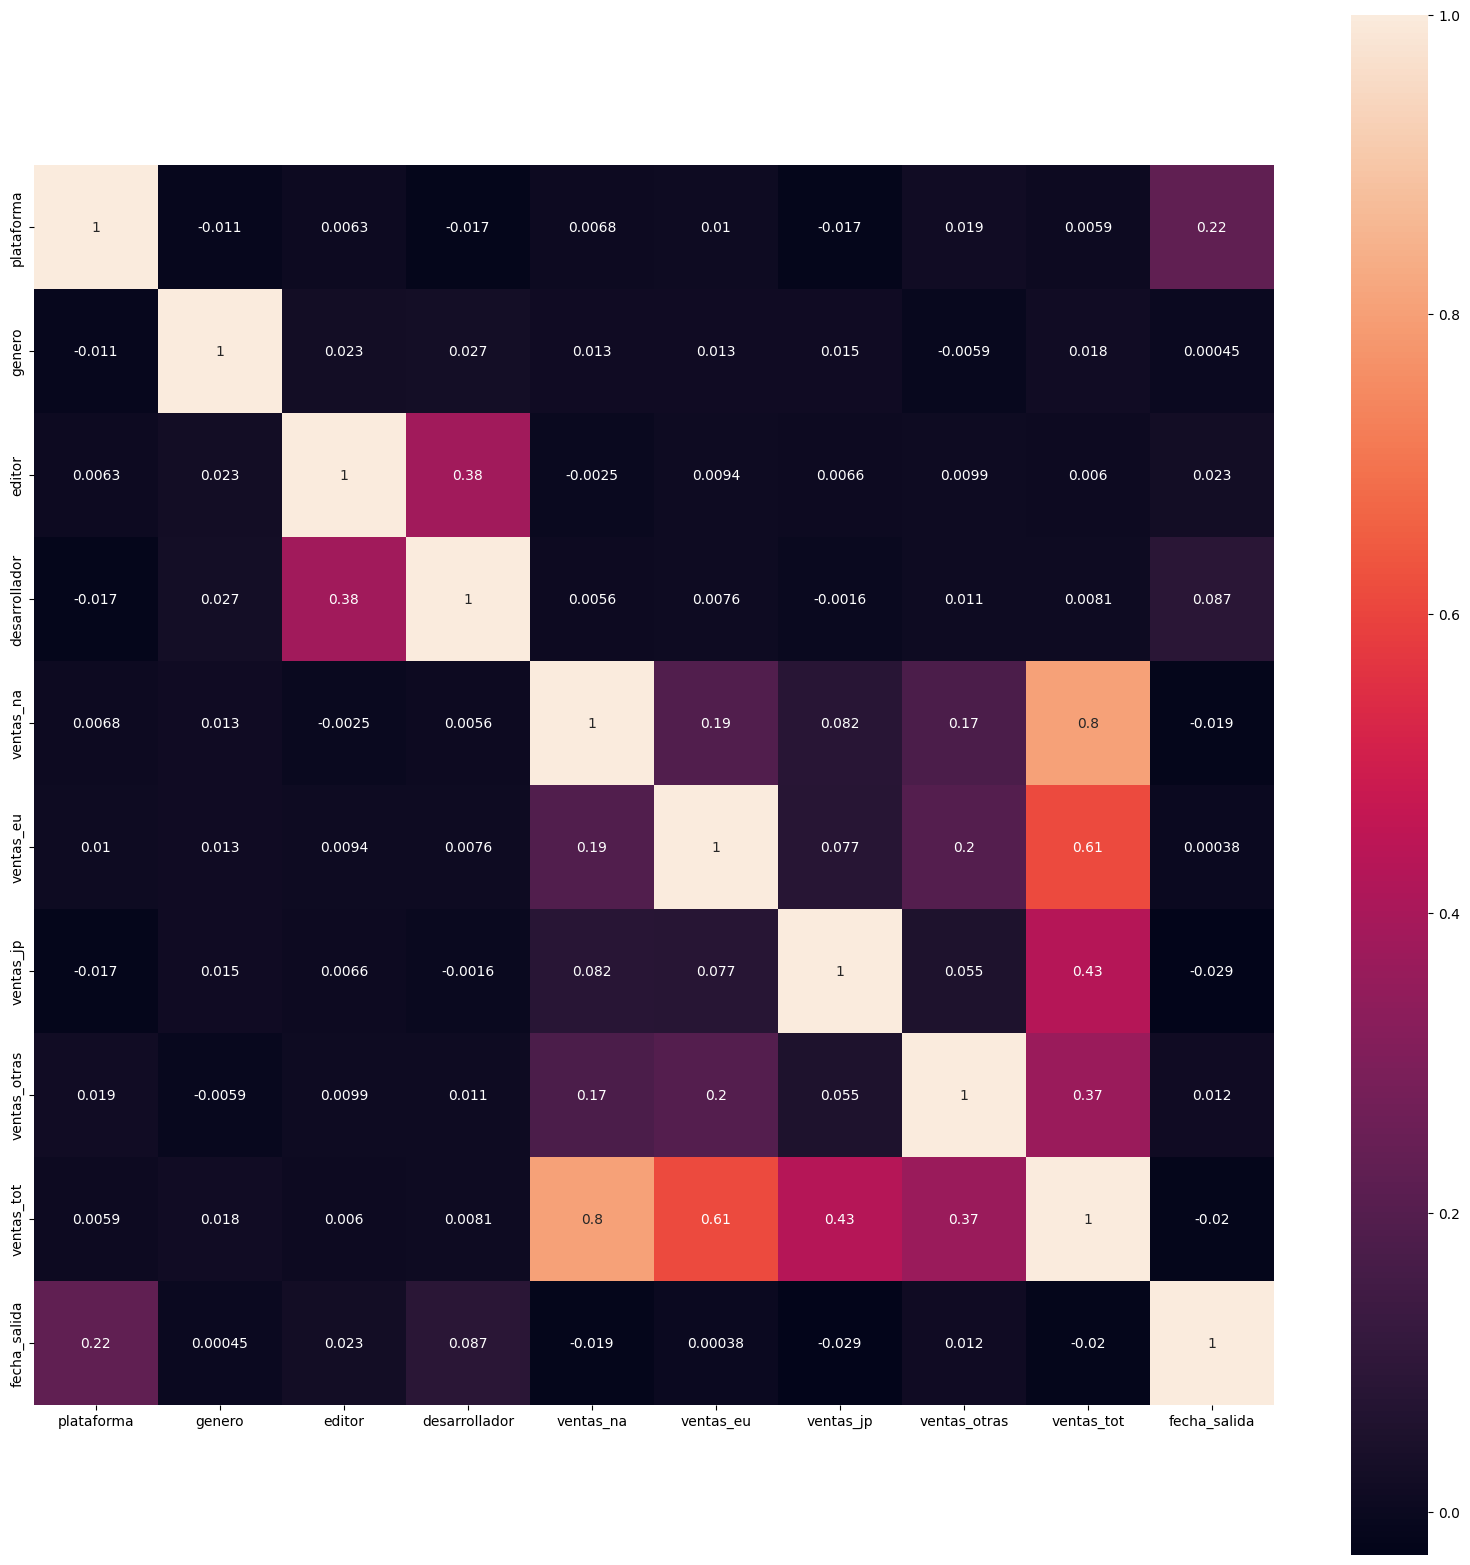

In [16]:
plt.figure(figsize=(20,20))

p = sns.heatmap(matriz_correlacion, annot=True, square=True)

Transformamos algunas variables para el entrenamiento del algortimo. LabelEncoder para pasar variables "string" a números.

In [11]:
encoder = LabelEncoder()

columnas_encoder = ['plataforma', 'genero', 'editor', 'desarrollador']
for columna in columnas_encoder:
    df[columna] = encoder.fit_transform(df[columna])

Al haber generado datos sintéticos tenemos que tener en cuenta que la eficacia del algoritmo resultante no será muy buena. La idea de generar estos datos es poder crear el algoritmo y con el tiempo, ir añadiendo datos reales para mejorar su eficacia a la hora de predecir.

In [12]:
X = df.drop(['ventas_tot', 'videojuego'], axis=1)
y = df['ventas_tot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

In [13]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [19]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", lreg.score(X_train, y_train))

MSE: 2.694612010621901e-27
MAE: 4.675293255408762e-14
R2: 1.0


El modelo predice demasiado bien. MSE es demasiado bajo, las predicciones se encuentra de media muy cerca de los valores reales. Al haber creado datos sintéticos a partir de la media y varianza es normal que el algoritmo prediga con tanta eficacia.

En un futuro habría que introducir más datos reales para disminuir el sobreajuste del algoritmo.